Missing values detected. Filling with column means.
Sample data:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  

Model Evaluation:
R² Score: 0.66
MAE: 3.15
MSE: 25.02
RMSE: 5.00

Sample Predictions:
True value: 23.60, Predicted value: 29.14
True value: 32.40, Predicted value: 36.54
True value: 13.60, Predicted value: 14.49
True value: 22.80, Predicted value: 25.08
True value: 16.10, Predi

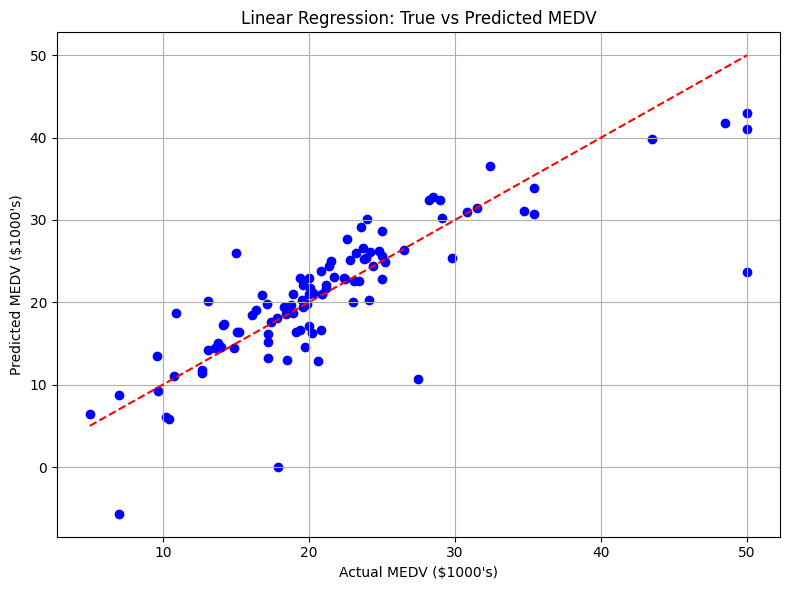

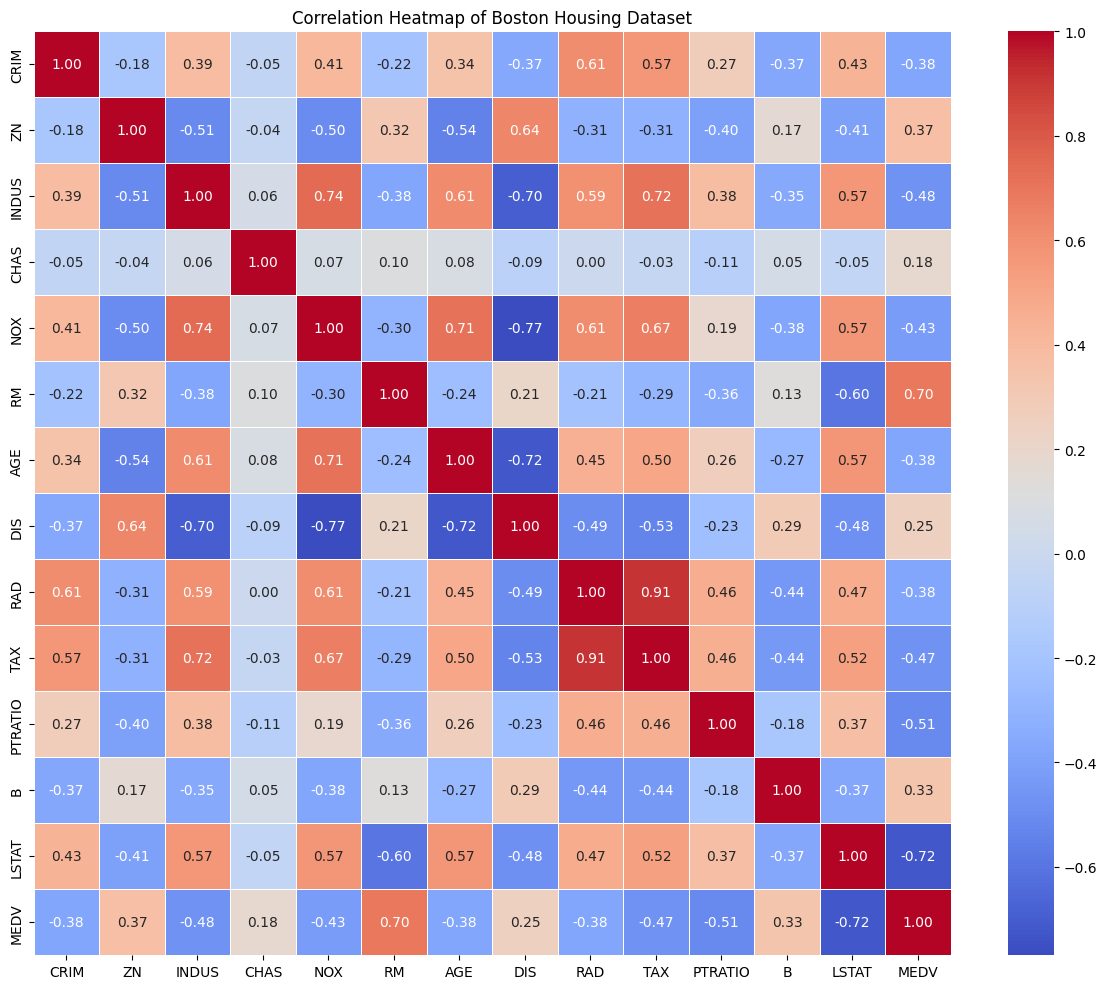

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('HousingData.csv')

# Check for missing values and fill them with column means
if df.isnull().values.any():
    print("Missing values detected. Filling with column means.")
    df.fillna(df.mean(), inplace=True)

# Show the first few rows
print("Sample data:\n", df.head())

# Separate features and target
X = df.drop("MEDV", axis=1)  # Features
y = df["MEDV"]               # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nModel Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Display sample predictions
print("\nSample Predictions:")
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"True value: {true:.2f}, Predicted value: {pred:.2f}")

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual MEDV ($1000's)")
plt.ylabel("Predicted MEDV ($1000's)")
plt.title("Linear Regression: True vs Predicted MEDV")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.tight_layout()
plt.show()
